<a href="https://colab.research.google.com/github/pvn-leo/DataAnalytics/blob/master/model1_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [5]:
cd

/root


In [6]:
cd /content/drive/My Drive/da5

/content/drive/My Drive/da5


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,6)})

In [8]:
#df=pd.read_csv('./US_accidents1.csv')
df = pd.read_csv('./US_accidents2.csv')

In [9]:
print("Rows : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows :  3048164
Columns :  32


In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'source', 'severity', 'start_time', 'end_time',
       'start_lat', 'start_lng', 'description', 'side', 'city', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'sunrise_sunset'],
      dtype='object')

In [11]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [12]:
missing_values_table(df)

The dataframe has 32 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
'''
df.side.value_counts()
li = list(df['side'].value_counts())
print(len(li))
print(len(df.columns))
minimal_categorical=['side','bump','crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming','traffic_signal','sunrise_sunset','year','month','day','hour','weekday']
one_hot_col = []
for i in range(32):
  ok = df.columns[i]
  li = list(df[ok].value_counts())
  if(len(li) >=2 and len(li)<=3):
    one_hot_col.append(ok)

print(one_hot_col)
#['source', 'side', 'amenity', 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal', 'sunrise_sunset']
'''

"\ndf.side.value_counts()\nli = list(df['side'].value_counts())\nprint(len(li))\nprint(len(df.columns))\nminimal_categorical=['side','bump','crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming','traffic_signal','sunrise_sunset','year','month','day','hour','weekday']\none_hot_col = []\nfor i in range(32):\n  ok = df.columns[i]\n  li = list(df[ok].value_counts())\n  if(len(li) >=2 and len(li)<=3):\n    one_hot_col.append(ok)\n\nprint(one_hot_col)\n#['source', 'side', 'amenity', 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal', 'sunrise_sunset']\n"

In [13]:
da = df.copy()

In [13]:
da.columns

Index(['Unnamed: 0', 'id', 'source', 'severity', 'start_time', 'end_time',
       'start_lat', 'start_lng', 'description', 'side', 'city', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'sunrise_sunset'],
      dtype='object')

### Analysis of Relevant Columns

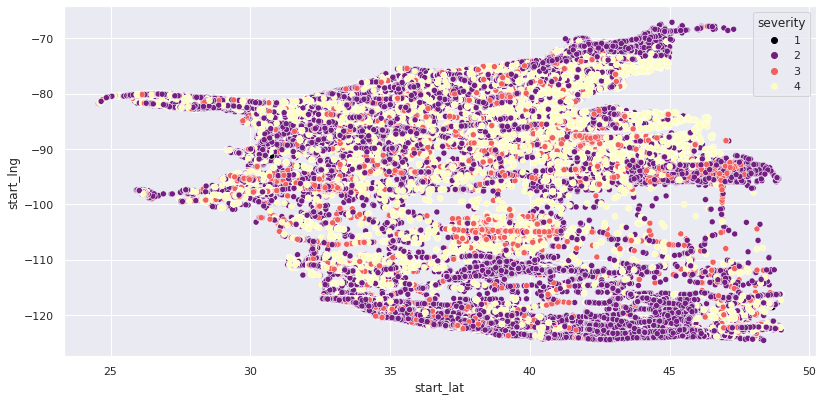

In [14]:
sns.scatterplot(data=df,x="start_lat",y="start_lng",hue="severity",palette="magma")

In [15]:
print(f'Unique City Names = {df.city.nunique()}\n\
Unique Weather Conditions = {df.weather_condition.nunique()}\n\
Unqiue Wind Directions = {df.wind_direction.nunique()}')

Unique City Names = 11513
Unique Weather Conditions = 125
Unqiue Wind Directions = 18


In [16]:
da[['side']] = da[['side']].astype(int) 

#Models

In [14]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score,accuracy_score

cv_split = StratifiedKFold(n_splits = 10)

In [33]:
target='severity'
unwanted_col=['Unnamed: 0','id', 'start_time','end_time','description','state','start_lat','start_lng','city','source', 'severity']
#remember to have severity collumn mentioned in the unwanted_col list

X = da.drop(unwanted_col, axis=1)
y = da[target]
class_names = list(y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

#### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic_regression = LogisticRegression(random_state=0, verbose=10,max_iter=100,n_jobs=-1)
%time logistic_regression.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 363 ms, sys: 421 ms, total: 784 ms
Wall time: 1min 51s


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=10, warm_start=False)

In [18]:
y_pred_logreg = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred_logreg, labels = da.severity.unique().tolist()))

              precision    recall  f1-score   support

           2       0.68      0.99      0.81    414357
           3       0.40      0.01      0.02    170567
           1       0.00      0.00      0.00      5693
           4       0.02      0.00      0.00     19016

    accuracy                           0.68    609633
   macro avg       0.28      0.25      0.21    609633
weighted avg       0.58      0.68      0.56    609633



In [19]:
acc = accuracy_score(y_test,y_pred_logreg)
f1 = f1_score(y_test,y_pred_logreg,average='weighted')

print(f"Accuracy: {acc}\nF1-score: {f1}")

Accuracy: 0.6784770509470451
F1-score: 0.555615599907052


Logistic Regression Confusion Matrix
[[     0   5662     31      0]
 [     8 411596   2676     77]
 [     1 168493   2024     49]
 [     0  18741    273      2]]


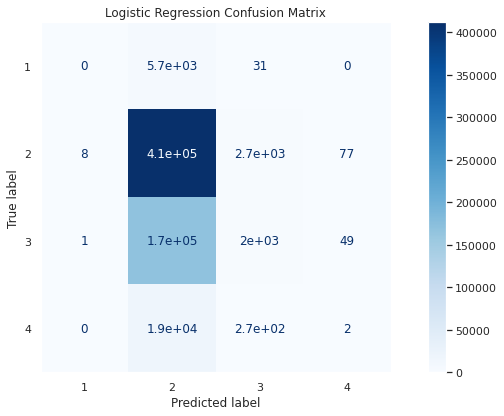

In [20]:
title = 'Logistic Regression Confusion Matrix'
disp = plot_confusion_matrix(logistic_regression, X_test, y_test,
                                 display_labels=class_names.sort(),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.grid(b=None)
plt.show()

#### ROC-AUC for Logistic Reg (One vs Rest)

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

y_for_roc = label_binarize(y, classes=[1, 2, 3, 4]) #y=da[target]
X_train, X_test, y_train, y_test = train_test_split(X, y_for_roc, test_size=0.2, random_state=0, stratify=y)
n_classes = y_for_roc.shape[1]
print(n_classes)

classifier = OneVsRestClassifier(LogisticRegression(random_state=0, verbose=10,max_iter=100,n_jobs=-1))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

4


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


In [48]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
#print(y_score)
#print(y_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [49]:
from scipy import interp
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

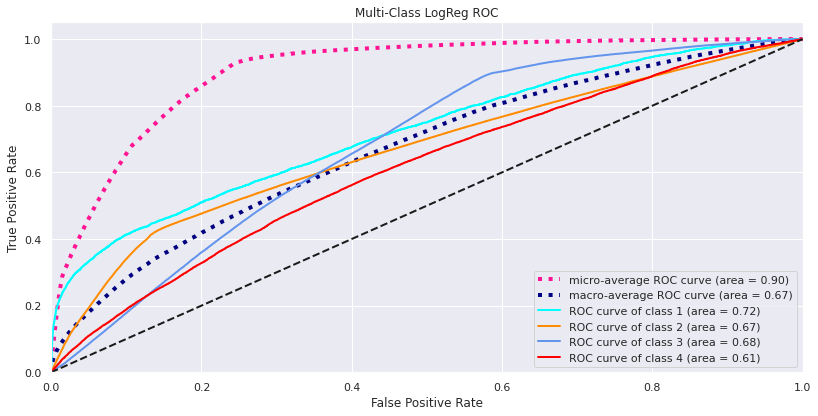

In [53]:
from itertools import cycle
lw=2
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format((i+1), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class LogReg ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cv_results = cross_validate(logistic_regression, X, y, cv = cv_split,verbose=5,n_jobs=-1,
                           scoring=('accuracy', 'f1_weighted'),
                           return_train_score = True)

In [ ]:
print(f"Average Fit Time: {cv_results['fit_time'].mean()} seconds")
print(f"Average Train Accuracy: {cv_results['train_accuracy'].mean()*100} %")
print(f"Average Test Accuracy: {cv_results['test_accuracy'].mean()*100} %")
print(f"Average Train F1_Score: {cv_results['train_f1_weighted'].mean()*100} %")
print(f"Average Test F1_Score: {cv_results['test_f1_weighted'].mean()*100} %")

---

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=2, random_state=0,verbose=1,n_jobs=-1)
%time rfc.fit(X_train,y_train)

In [ ]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc, labels = da.severity.unique().tolist()))

In [ ]:
acc = accuracy_score(y_test,y_pred_rfc)
f1 = f1_score(y_test,y_pred_rfc,average='weighted')

print(f"Accuracy: {acc}\nF1-score: {f1}")

In [ ]:
title = 'Random Forest Classifier Confusion Matrix'
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names.sort(),
                                 cmap='YlOrBr')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.axis('off')
plt.show()

In [ ]:
cv_results = cross_validate(rfc, X, y, cv = cv_split,verbose=5,n_jobs=-1,
                           scoring=('accuracy', 'f1_weighted'),
                           return_train_score = True)

In [ ]:
print(f"Average Fit Time: {cv_results['fit_time'].mean()} seconds")
print(f"Average Train Accuracy: {cv_results['train_accuracy'].mean()*100} %")
print(f"Average Test Accuracy: {cv_results['test_accuracy'].mean()*100} %")
print(f"Average Train F1_Score: {cv_results['train_f1_weighted'].mean()*100} %")
print(f"Average Test F1_Score: {cv_results['test_f1_weighted'].mean()*100} %")

---

#### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6,n_jobs=-1)
%time knn.fit(X_train,y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn, labels = da.severity.unique().tolist()))

In [ ]:
acc = accuracy_score(y_test,y_pred_knn)
f1 = f1_score(y_test,y_pred_knn,average='weighted')

print(f"Accuracy: {acc}\nF1-score: {f1}")

In [ ]:
title = 'Random Forest Classifier Confusion Matrix'
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names.sort(),
                                 cmap='YlOrBr')
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.axis('off')
plt.show()

In [ ]:
cv_results = cross_validate(knn, X, y, cv = cv_split,verbose=5,n_jobs=-1,
                           scoring=('accuracy', 'f1_weighted'),
                           return_train_score = True)

In [ ]:
print(f"Average Fit Time: {cv_results['fit_time'].mean()} seconds")
print(f"Average Train Accuracy: {cv_results['train_accuracy'].mean()*100} %")
print(f"Average Test Accuracy: {cv_results['test_accuracy'].mean()*100} %")
print(f"Average Train F1_Score: {cv_results['train_f1_weighted'].mean()*100} %")
print(f"Average Test F1_Score: {cv_results['test_f1_weighted'].mean()*100} %")

---

### Hyperparameter Optimization

In [ ]:
from sklearn import tree, linear_model, neighbors, ensemble, gaussian_process,model_selection
from xgboost import XGBClassifier

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM (general linear model)
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #xgboost
    XGBClassifier()    
    ]


voters = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    ('lr', linear_model.LogisticRegressionCV()),
    ('sgd', linear_model.SGDClassifier()),
    ('knn', neighbors.KNeighborsClassifier()),
    ('xgb', XGBClassifier())
]

In [ ]:
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = voters , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X, y, cv  = cv_split,return_train_score=True,scoring=('accuracy', 'f1_weighted'))
vote_hard.fit(X, y)

print(f"Hard Voting Training Accuracy mean: {vote_hard_cv['train_accuracy'].mean()*100} %") 
print(f"Hard Voting Test Accuracy mean: {vote_hard_cv['test_accuracy'].mean()*100} %")
print(f"Hard Voting Train F1_Score: {vote_hard_cv['train_f1_weighted'].mean()*100} %")
print(f"Hard Voting Test F1_Score: {vote_hard_cv['test_f1_weighted'].mean()*100} %")

In [ ]:
grid_seed = [0]
grid_bool = [True, False]
grid_criterion = ['gini', 'entropy']
grid_n_estimator = range(50,350,50)
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]

grid_param = [
            [{
            #AdaBoostClassifier 
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default = 0.1
            'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
    


            [{
            #GradientBoostingClassifier 
            'learning_rate': grid_learn, #default=0.1 
            'n_estimators': grid_n_estimator, #default=100 
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default='gini'
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True],
            'random_state': grid_seed
             }],
    
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            'penalty': ['l1','l2','elasticnet'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
                
    
            #SGDClassifier - 
            [{}],
    
    
            [{
            #KNeighborsClassifier 
            'n_neighbors': range(3,15,2), #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            

            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]


In [ ]:
start_total = time.perf_counter() 
for clf, param in zip (voters, grid_param): 
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'accuracy')
    best_search.fit(X, y)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 
    print('-'*10)

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

In [ ]:
grid_hard = ensemble.VotingClassifier(estimators = voters , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X, y, cv  = cv_split,return_train_score=True,scoring=('accuracy', 'f1_weighted'))
grid_hard.fit(X, y)

print(f"Hard Voting Training Accuracy mean: {vote_hard_cv['train_accuracy'].mean()*100} %") 
print(f"Hard Voting Test Accuracy mean: {vote_hard_cv['test_accuracy'].mean()*100} %")
print(f"Hard Voting Train F1_Score: {vote_hard_cv['train_f1_weighted'].mean()*100} %")
print(f"Hard Voting Test F1_Score: {vote_hard_cv['test_f1_weighted'].mean()*100} %")